###### Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('glass.csv')

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

###### Data Visualization

<AxesSubplot:xlabel='Na', ylabel='Count'>

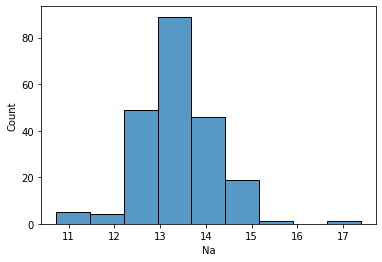

In [7]:
sns.histplot(x=df['Na'],bins=9,palette='Set1')

<AxesSubplot:xlabel='Type', ylabel='count'>

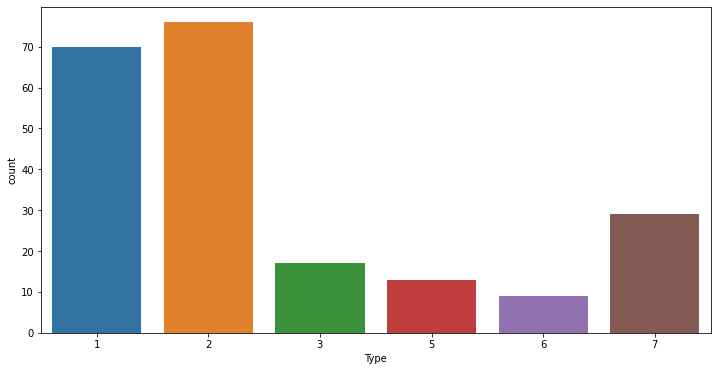

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(df['Type'])

<AxesSubplot:xlabel='Type', ylabel='RI'>

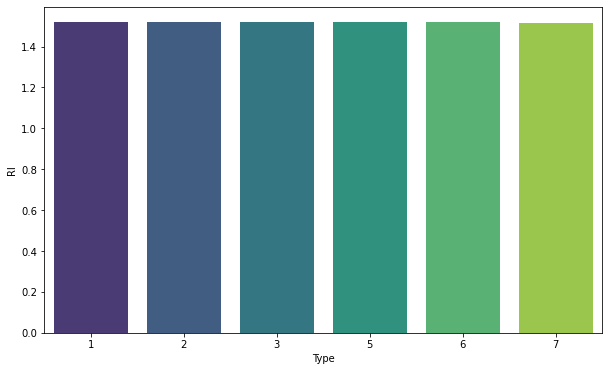

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Type'],y=df['RI'],palette='viridis',ci=False)

In [10]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

<AxesSubplot:>

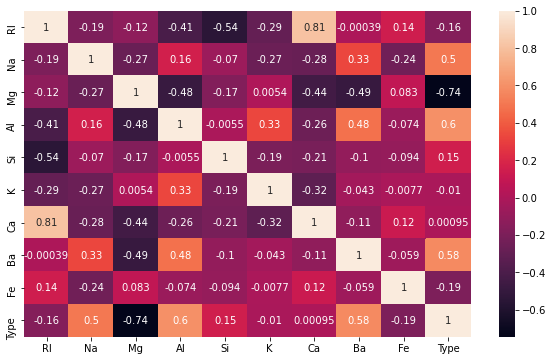

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

###### Segregate X and y variables

In [12]:
X=df.drop('Type',axis=1)

In [13]:
y=df['Type']

###### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()

In [18]:
X_train=scaler.fit_transform(X_train)

In [19]:
X_test=scaler.transform(X_test)

###### Which kind of ML algorithm is most suitable for this dataset Random Forest , KNN or other?

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [21]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [22]:
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [23]:
rfc_model=RandomForestClassifier()
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

In [24]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [33]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,X,y_test)

In [34]:
print("LOGISTIC REGRESSION MODEL")
report(log_model)

LOGISTIC REGRESSION MODEL
              precision    recall  f1-score   support

           1       0.59      0.67      0.63        24
           2       0.69      0.35      0.47        31
           3       0.00      0.00      0.00         0
           5       0.60      0.75      0.67         4
           6       0.50      0.67      0.57         3
           7       0.50      0.67      0.57         3

    accuracy                           0.52        65
   macro avg       0.48      0.52      0.48        65
weighted avg       0.63      0.52      0.55        65



ValueError: Expected 2D array, got 1D array instead:
array=[2 5 1 6 1 2 5 7 1 2 2 2 2 2 2 2 5 1 2 2 1 1 1 7 1 1 2 2 2 2 2 1 2 1 2 1 2
 2 1 7 1 2 1 2 2 2 2 5 2 1 6 6 1 2 2 2 1 1 2 1 1 1 1 2 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
print("KNN MODEL")
report(knn_model)

In [ ]:
print("RANDOM FOREST CLASSIFIER MODEL")
report(rfc_model)

###### We can see from the above results that the Random Forest Classifier is better than other ML algorithms.